In [1]:
from pytrends.request import TrendReq

pytrends = TrendReq(hl='en-US')

In [2]:
all_entities = {
    'BTC': '%2Fm%2F05p0rrx',
    'ETH': '%2Fm%2F0108bn2x',
    'BNB': '%2Fg%2F11hcz1r4wl',
    'DOT': '%2Fg%2F11f3mbgrgj',
    'SOL': 'solana', # entity '%2Fg%2F11qh5y640t' does not work
    'LUNA': 'luna+coin', # no entity for $LUNA
    'ADA': '%2Fg%2F11gf2dcwbj',
    'CRO': '%2Fg%2F11mpd28vqp',
    'AXS': '%2Fg%2F11fpjwyy5z',
    'SAND': '%2Fm%2F0120wm2g',
    'DOGE': '%2Fm%2F0zmxk9t',
    'SHIB': '%2Fg%2F11q1jsfvsn',
    'MATIC': 'matic+coin', # entity '%2Fg%2F11grv3dnhn' does not work
}

entities_5by5 = []

def urlenc(x):
    return x.replace('%2F', '/')

for i, (k, v) in enumerate(all_entities.items()):
    if i == 0:
        continue # BTC is in all 5by5s
    if (i - 1) % 4 == 0:
        entities = {'BTC': urlenc(all_entities['BTC'])}
        entities_5by5.append(entities)
    entities[k] = urlenc(v)
    
entities_5by5

[{'BTC': '/m/05p0rrx',
  'ETH': '/m/0108bn2x',
  'BNB': '/g/11hcz1r4wl',
  'DOT': '/g/11f3mbgrgj',
  'SOL': 'solana'},
 {'BTC': '/m/05p0rrx',
  'LUNA': 'luna+coin',
  'ADA': '/g/11gf2dcwbj',
  'CRO': '/g/11mpd28vqp',
  'AXS': '/g/11fpjwyy5z'},
 {'BTC': '/m/05p0rrx',
  'SAND': '/m/0120wm2g',
  'DOGE': '/m/0zmxk9t',
  'SHIB': '/g/11q1jsfvsn',
  'MATIC': 'matic+coin'}]

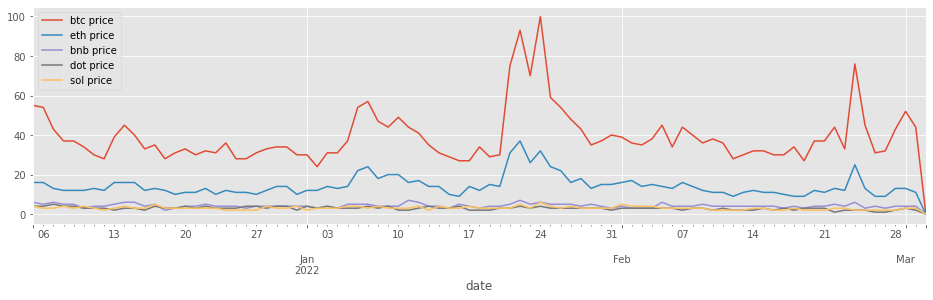

            BTC  ETH  BNB  DOT  SOL
date                               
2021-12-15   40   16    6    3    3
2021-12-16   33   12    4    2    3
2021-12-17   35   13    5    4    5
2021-12-18   28   12    2    3    3
2021-12-19   31   10    3    3    3
...         ...  ...  ...  ...  ...
2022-02-27   32    9    3    1    2
2022-02-28   43   13    4    2    2
2022-03-01   52   13    4    3    3
2022-03-02   44   11    4    2    3
2022-03-03    0    0    0    0    0

[79 rows x 5 columns]


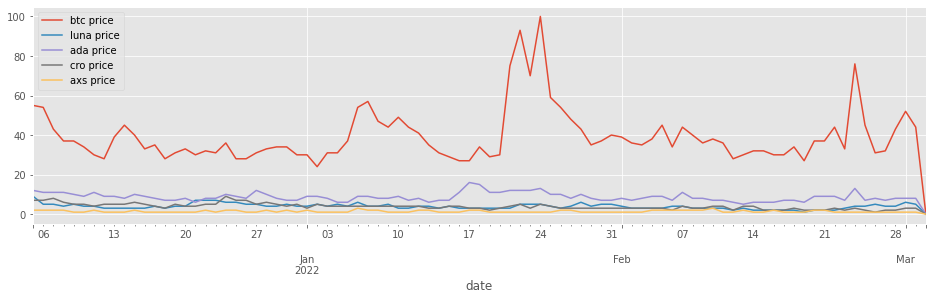

            BTC  LUNA  ADA  CRO  AXS
date                                
2021-12-15   40     3   10    6    2
2021-12-16   33     3    9    5    1
2021-12-17   35     4    8    4    1
2021-12-18   28     3    7    3    1
2021-12-19   31     4    7    5    1
...         ...   ...  ...  ...  ...
2022-02-27   32     4    7    2    1
2022-02-28   43     4    8    2    1
2022-03-01   52     6    8    3    1
2022-03-02   44     5    8    3    1
2022-03-03    0     0    0    0    0

[79 rows x 5 columns]


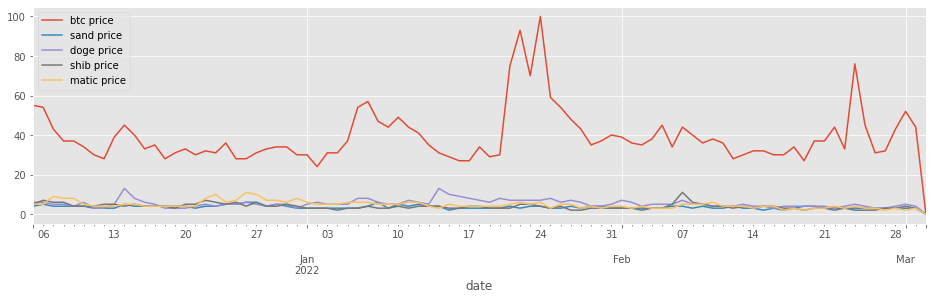

            BTC  SAND  DOGE  SHIB  MATIC
date                                    
2021-12-15   40     4     8     5      5
2021-12-16   33     4     6     4      4
2021-12-17   35     4     5     4      4
2021-12-18   28     4     3     4      4
2021-12-19   31     4     3     3      4
...         ...   ...   ...   ...    ...
2022-02-27   32     3     3     3      2
2022-02-28   43     3     4     3      3
2022-03-01   52     3     5     4      2
2022-03-02   44     3     4     3      3
2022-03-03    0     0     0     0      0

[79 rows x 5 columns]


[            BTC  ETH  BNB  DOT  SOL
 date                               
 2021-12-15   40   16    6    3    3
 2021-12-16   33   12    4    2    3
 2021-12-17   35   13    5    4    5
 2021-12-18   28   12    2    3    3
 2021-12-19   31   10    3    3    3
 ...         ...  ...  ...  ...  ...
 2022-02-27   32    9    3    1    2
 2022-02-28   43   13    4    2    2
 2022-03-01   52   13    4    3    3
 2022-03-02   44   11    4    2    3
 2022-03-03    0    0    0    0    0
 
 [79 rows x 5 columns],
             BTC  LUNA  ADA  CRO  AXS
 date                                
 2021-12-15   40     3   10    6    2
 2021-12-16   33     3    9    5    1
 2021-12-17   35     4    8    4    1
 2021-12-18   28     3    7    3    1
 2021-12-19   31     4    7    5    1
 ...         ...   ...  ...  ...  ...
 2022-02-27   32     4    7    2    1
 2022-02-28   43     4    8    2    1
 2022-03-01   52     6    8    3    1
 2022-03-02   44     5    8    3    1
 2022-03-03    0     0    0    0    0

In [3]:
import matplotlib.pyplot as plt
from datetime import datetime
import pandas as pd

plt.rcParams["figure.figsize"] = (16, 4)
plt.style.use('ggplot')

def google_trends(entities, use_suffix=None):
    if use_suffix is not None:
        queries = [f"{coin.lower()} price" for coin in entities]
    else:
        queries = list(entities.values())
    pytrends.build_payload(queries, timeframe='today 3-m')

    data = pytrends.interest_over_time()

    data.plot()
    plt.show()
    
    data = data[(datetime(2021, 12, 15) <= data.index) & (data.index <= datetime(2022, 3, 4))]

    out = pd.DataFrame()
    for k, q in zip(entities, queries):
        out[k] = data[q]

    print(out)
    return out

out_all = [google_trends(entities, use_suffix='price') for entities in entities_5by5]
out_all

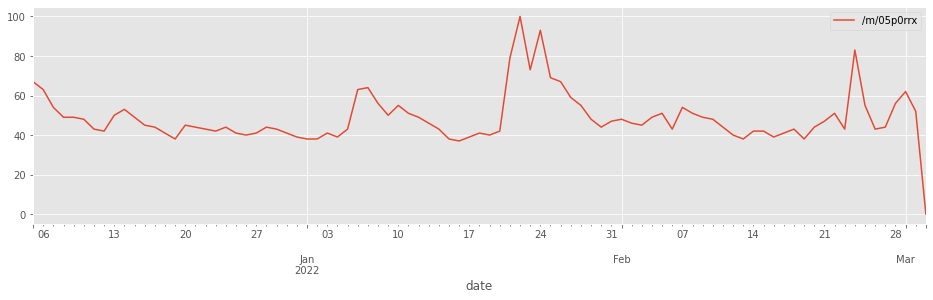

            BTC
date           
2021-12-15   49
2021-12-16   45
2021-12-17   44
2021-12-18   41
2021-12-19   38
...         ...
2022-02-27   44
2022-02-28   56
2022-03-01   62
2022-03-02   52
2022-03-03    0

[79 rows x 1 columns]


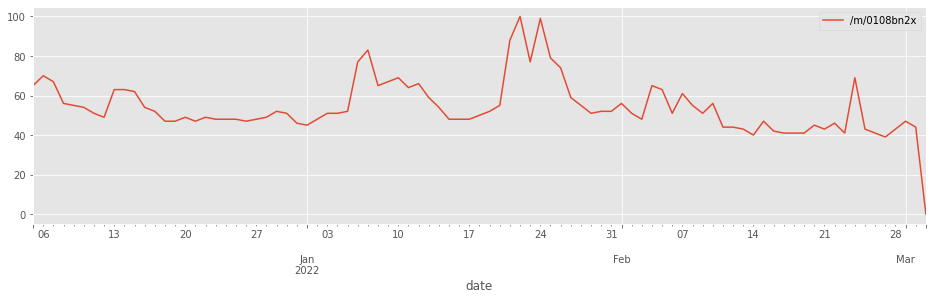

            ETH
date           
2021-12-15   62
2021-12-16   54
2021-12-17   52
2021-12-18   47
2021-12-19   47
...         ...
2022-02-27   39
2022-02-28   43
2022-03-01   47
2022-03-02   44
2022-03-03    0

[79 rows x 1 columns]


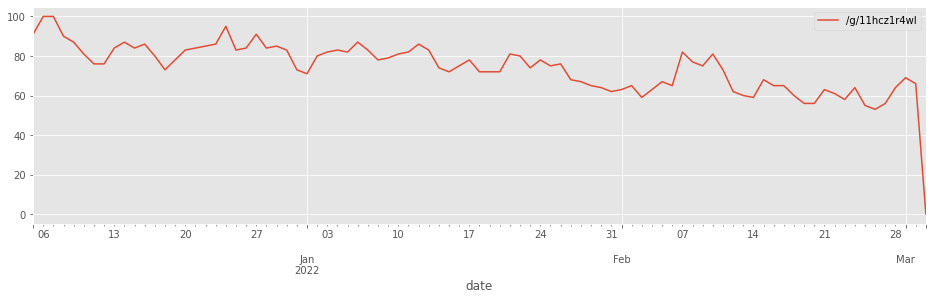

            BNB
date           
2021-12-15   84
2021-12-16   86
2021-12-17   80
2021-12-18   73
2021-12-19   78
...         ...
2022-02-27   56
2022-02-28   64
2022-03-01   69
2022-03-02   66
2022-03-03    0

[79 rows x 1 columns]


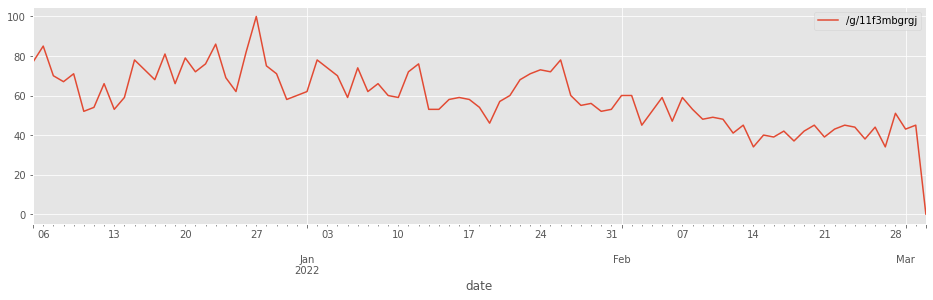

            DOT
date           
2021-12-15   78
2021-12-16   73
2021-12-17   68
2021-12-18   81
2021-12-19   66
...         ...
2022-02-27   34
2022-02-28   51
2022-03-01   43
2022-03-02   45
2022-03-03    0

[79 rows x 1 columns]


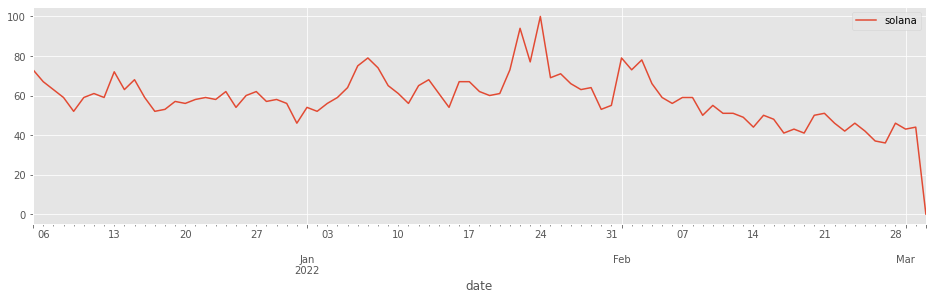

            SOL
date           
2021-12-15   68
2021-12-16   59
2021-12-17   52
2021-12-18   53
2021-12-19   57
...         ...
2022-02-27   36
2022-02-28   46
2022-03-01   43
2022-03-02   44
2022-03-03    0

[79 rows x 1 columns]


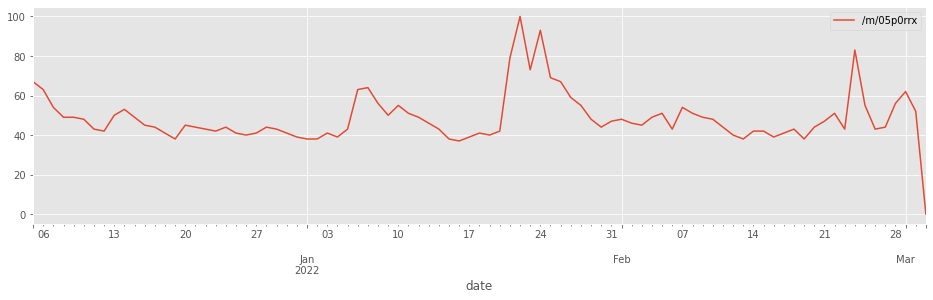

            BTC
date           
2021-12-15   49
2021-12-16   45
2021-12-17   44
2021-12-18   41
2021-12-19   38
...         ...
2022-02-27   44
2022-02-28   56
2022-03-01   62
2022-03-02   52
2022-03-03    0

[79 rows x 1 columns]


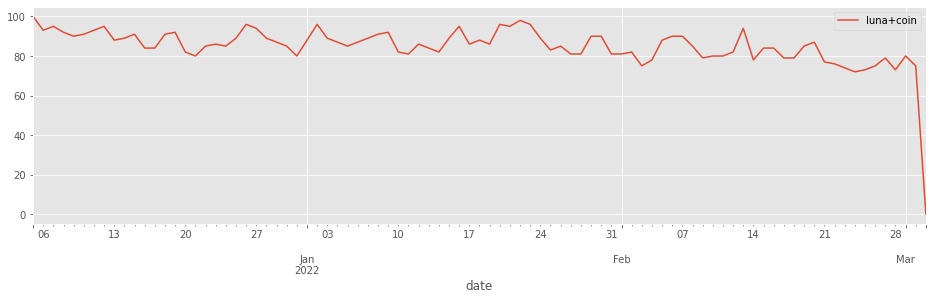

            LUNA
date            
2021-12-15    91
2021-12-16    84
2021-12-17    84
2021-12-18    91
2021-12-19    92
...          ...
2022-02-27    79
2022-02-28    73
2022-03-01    80
2022-03-02    75
2022-03-03     0

[79 rows x 1 columns]


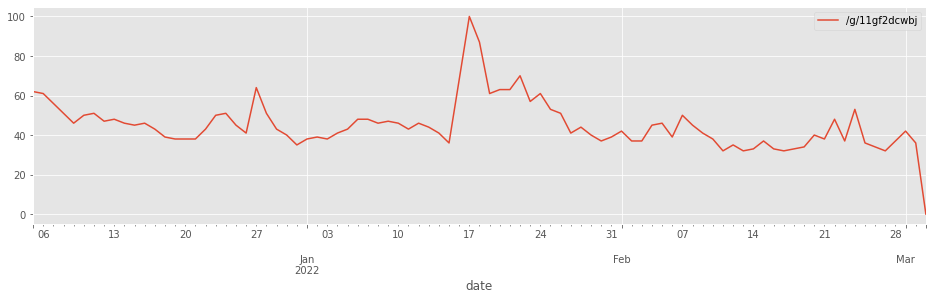

            ADA
date           
2021-12-15   45
2021-12-16   46
2021-12-17   43
2021-12-18   39
2021-12-19   38
...         ...
2022-02-27   32
2022-02-28   37
2022-03-01   42
2022-03-02   36
2022-03-03    0

[79 rows x 1 columns]


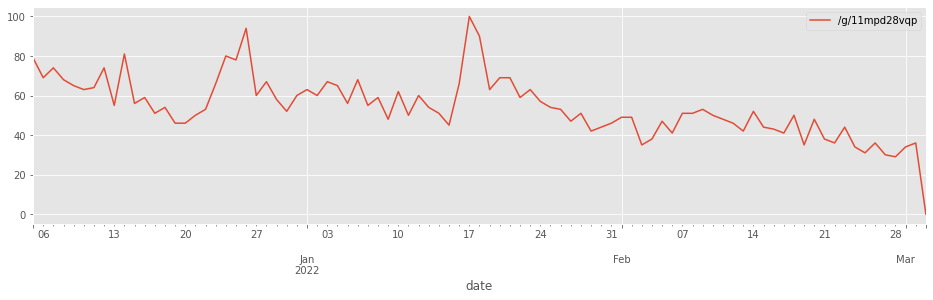

            CRO
date           
2021-12-15   56
2021-12-16   59
2021-12-17   51
2021-12-18   54
2021-12-19   46
...         ...
2022-02-27   30
2022-02-28   29
2022-03-01   34
2022-03-02   36
2022-03-03    0

[79 rows x 1 columns]


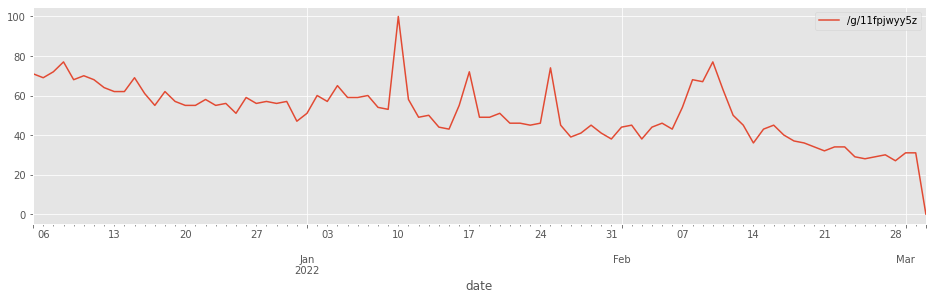

            AXS
date           
2021-12-15   69
2021-12-16   61
2021-12-17   55
2021-12-18   62
2021-12-19   57
...         ...
2022-02-27   30
2022-02-28   27
2022-03-01   31
2022-03-02   31
2022-03-03    0

[79 rows x 1 columns]


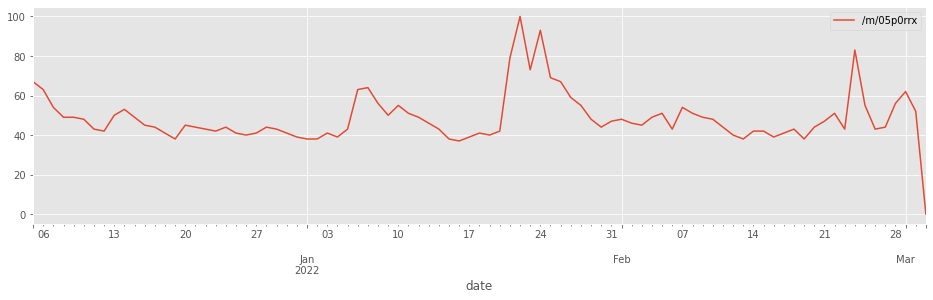

            BTC
date           
2021-12-15   49
2021-12-16   45
2021-12-17   44
2021-12-18   41
2021-12-19   38
...         ...
2022-02-27   44
2022-02-28   56
2022-03-01   62
2022-03-02   52
2022-03-03    0

[79 rows x 1 columns]


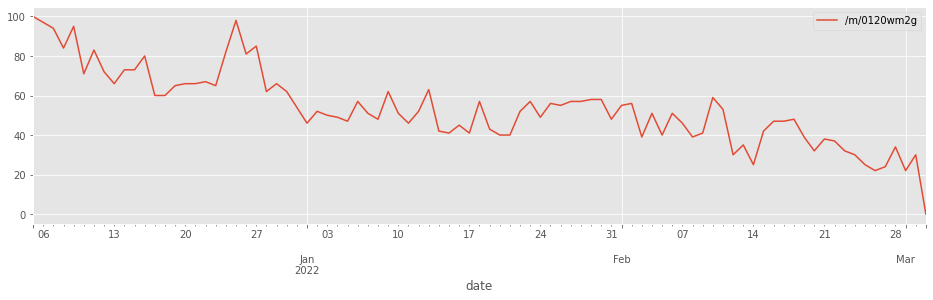

            SAND
date            
2021-12-15    73
2021-12-16    80
2021-12-17    60
2021-12-18    60
2021-12-19    65
...          ...
2022-02-27    24
2022-02-28    34
2022-03-01    22
2022-03-02    30
2022-03-03     0

[79 rows x 1 columns]


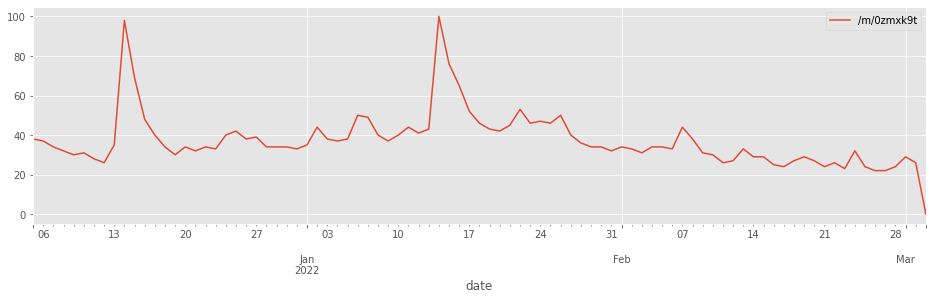

            DOGE
date            
2021-12-15    69
2021-12-16    48
2021-12-17    40
2021-12-18    34
2021-12-19    30
...          ...
2022-02-27    22
2022-02-28    24
2022-03-01    29
2022-03-02    26
2022-03-03     0

[79 rows x 1 columns]


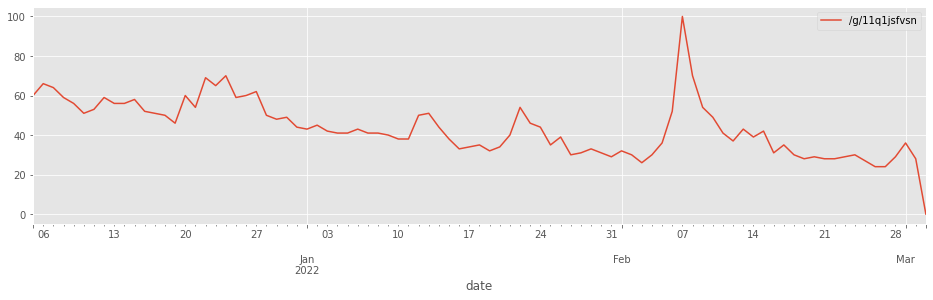

            SHIB
date            
2021-12-15    58
2021-12-16    52
2021-12-17    51
2021-12-18    50
2021-12-19    46
...          ...
2022-02-27    24
2022-02-28    29
2022-03-01    36
2022-03-02    28
2022-03-03     0

[79 rows x 1 columns]


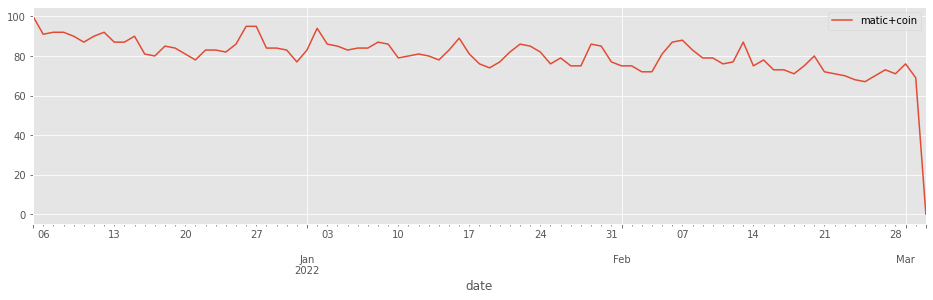

            MATIC
date             
2021-12-15     90
2021-12-16     81
2021-12-17     80
2021-12-18     85
2021-12-19     84
...           ...
2022-02-27     73
2022-02-28     71
2022-03-01     76
2022-03-02     69
2022-03-03      0

[79 rows x 1 columns]


In [4]:
dfs = {}

for i, entities in enumerate(entities_5by5):
    for coin, entity in entities.items():
        dfs[coin] = google_trends({coin: entity})
        dfs[coin][coin] = dfs[coin][coin] / dfs[coin][coin].max() * out_all[i][coin].max()

In [5]:
out = pd.concat(dfs.values(), axis=1)
out

,BTC,ETH,BNB,DOT,SOL,LUNA,ADA,CRO,AXS,SAND,DOGE,SHIB,MATIC
date,,,,,,,,,,,,,
2021-12-15,49.0,22.94,6.189474,3.12,4.08,6.500000,7.20,5.04,2.07,4.469388,8.97,6.38,10.421053
2021-12-16,45.0,19.98,6.336842,2.92,3.54,6.000000,7.36,5.31,1.83,4.897959,6.24,5.72,9.378947
2021-12-17,44.0,19.24,5.894737,2.72,3.12,6.000000,6.88,4.59,1.65,3.673469,5.20,5.61,9.263158
2021-12-18,41.0,17.39,5.378947,3.24,3.18,6.500000,6.24,4.86,1.86,3.673469,4.42,5.50,9.842105
2021-12-19,38.0,17.39,5.747368,2.64,3.42,6.571429,6.08,4.14,1.71,3.979592,3.90,5.06,9.726316
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-27,44.0,14.43,4.126316,1.36,2.16,5.642857,5.12,2.70,0.90,1.469388,2.86,2.64,8.452632
2022-02-28,56.0,15.91,4.715789,2.04,2.76,5.214286,5.92,2.61,0.81,2.081633,3.12,3.19,8.221053
2022-03-01,62.0,17.39,5.084211,1.72,2.58,5.714286,6.72,3.06,0.93,1.346939,3.77,3.96,8.800000


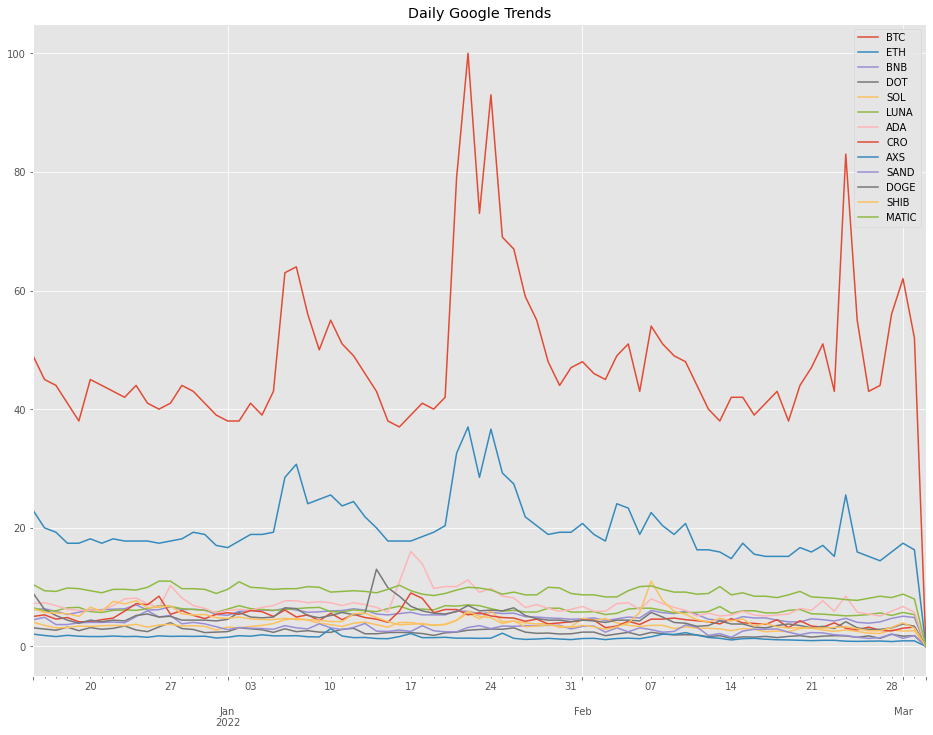

In [6]:
plt.rcParams["figure.figsize"] = (16, 12)
plt.style.use('ggplot')

ax = out.plot(title="Daily Google Trends")
ax.xaxis.label.set_visible(False)

plt.show()

In [7]:
out.to_csv('google-trends/training.csv')